In [5]:
import numpy as np

import matplotlib.pyplot as plt



In [4]:
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
import itertools
import warnings
warnings.filterwarnings("ignore")


In [8]:
matches  = pd.read_csv(r"WorldCupMatches.csv")
cups     = pd.read_csv(r"WorldCups.csv")
display("MATCHES - DATA")
display(matches.head(3))
display("WORLD CUPS - DATA")
display(cups.head(3))

'MATCHES - DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


'WORLD CUPS - DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Lattitude_w,Longitude_w
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,34°50'S,56°11'W
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363,41°54'N,12°29'E
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7,41°54'N,12°29'E


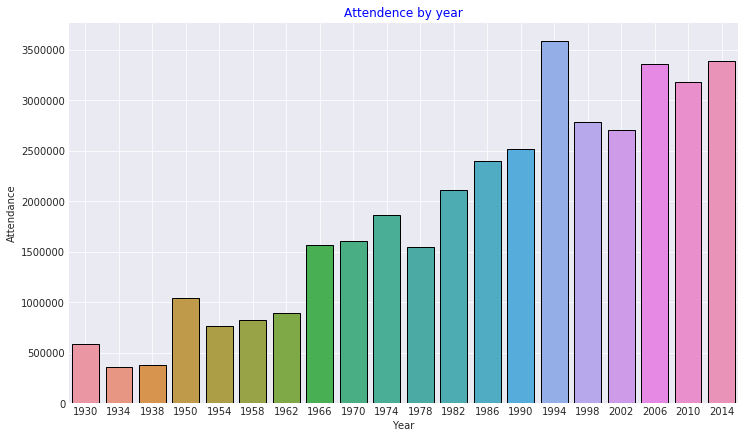

In [13]:
matches.isnull().sum()
sns.set_style("darkgrid")

matches = matches.drop_duplicates(subset="MatchID",keep="first")

matches = matches[matches["Year"].notnull()]

att = matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att["Year"],att["Attendance"],linewidth=1,edgecolor="black")
plt.grid(True)
plt.title("Attendence by year",color='b')
plt.show()

In [7]:
display(matches.head(3))

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


keepcol=['Year','Datetime','Stadium','City','Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Attendence','MatchID','Home Team Initials',Away Team Initials']

In [8]:
new_matches=pd.read_csv("WorldCupMatches.csv", usecols= ['Year','Datetime','Stadium','City','Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Attendance','MatchID','Home Team Initials','Away Team Initials'])


In [9]:
display(new_matches.head(3))

,Year,Datetime,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0,1093.0,YUG,BRA


In [10]:
display(cups.head(3))


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


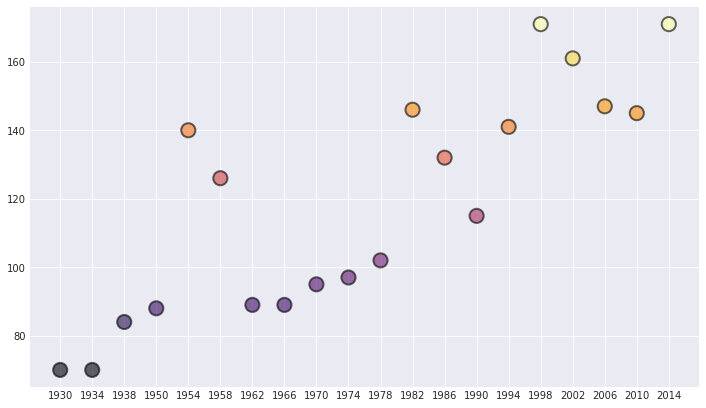

In [10]:
plt.figure(figsize=(12,7))
cups["Year1"] = cups["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=cups,
            c=cups["GoalsScored"],cmap="inferno",
            s=200,alpha=0.6,
            linewidth=2,edgecolor="k",)

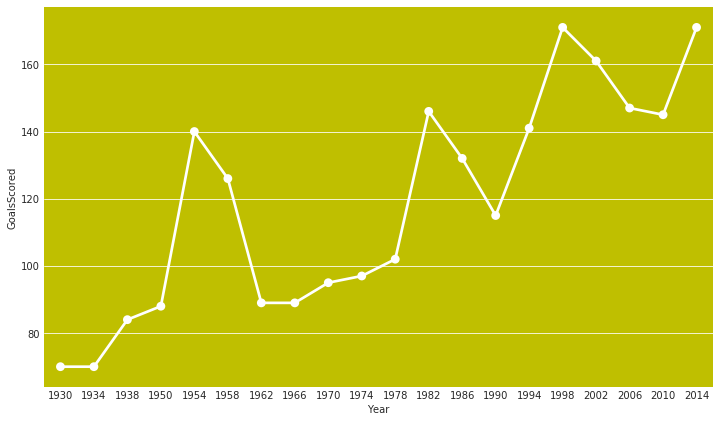

In [12]:
plt.figure(figsize=(12,7))
ax = sns.pointplot(cups["Year"],cups["GoalsScored"],color="w")
ax.set_facecolor("y")

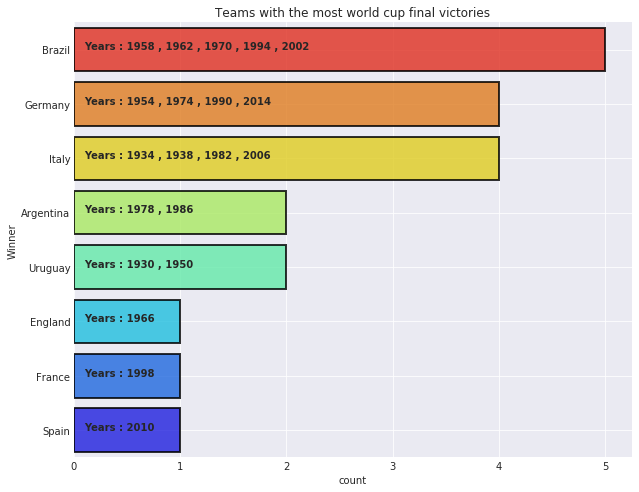

In [11]:
cups["Winner"]=cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany")
c1  = cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = cups.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(10,8))
ax = sns.barplot("Year","Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor="k"*len(c12))
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories")
plt.grid(True)
plt.xlabel("count")
plt.show()

In [22]:
display(cups.head(3))

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Year1
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,1930
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,1934
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,1938


In [29]:
players= pd.read_csv("WorldCupPlayers.csv") 
display(players.head(10))

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,201,1096,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


In [15]:
new_players=pd.read_csv("WorldCupPlayers.csv", usecols= ['Team Initials','Coach Name','Player Name','Position'])
display(new_players.head(10))

,Team Initials,Coach Name,Player Name,Position
0,FRA,CAUDRON Raoul (FRA),Alex THEPOT,GK
1,MEX,LUQUE Juan (MEX),Oscar BONFIGLIO,GK
2,FRA,CAUDRON Raoul (FRA),Marcel LANGILLER,NaN
3,MEX,LUQUE Juan (MEX),Juan CARRENO,NaN
4,FRA,CAUDRON Raoul (FRA),Ernest LIBERATI,NaN
5,MEX,LUQUE Juan (MEX),Rafael GARZA,C
6,FRA,CAUDRON Raoul (FRA),Andre MASCHINOT,NaN
7,MEX,LUQUE Juan (MEX),Hilario LOPEZ,NaN
8,FRA,CAUDRON Raoul (FRA),Etienne MATTLER,NaN
9,MEX,LUQUE Juan (MEX),Dionisio MEJIA,NaN


<bound method NDFrame.head of      country  count    type
0     Brazil      5  WINNER
1      Italy      4  WINNER
2    Germany      4  WINNER
3    Uruguay      2  WINNER
4  Argentina      2  WINNER
5    England      1  WINNER
6      Spain      1  WINNER
7     France      1  WINNER>

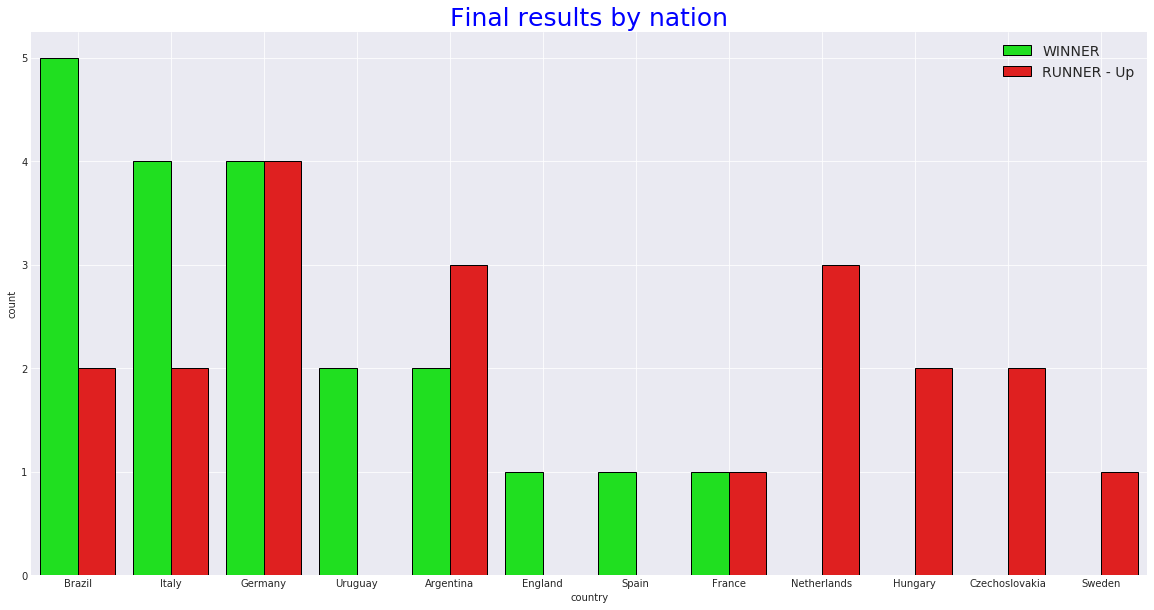

In [12]:
cou = cups["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"
display(cou_w.head)

cou_r = cups["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r],axis=0)

plt.figure(figsize=(20,10))
sns.barplot("country","count",data=cou_t,
            hue="type",palette=["lime","r"],
            linewidth=1,edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="upper right",prop={"size":14})
plt.title("Final results by nation",color='b',size=25)
plt.show()

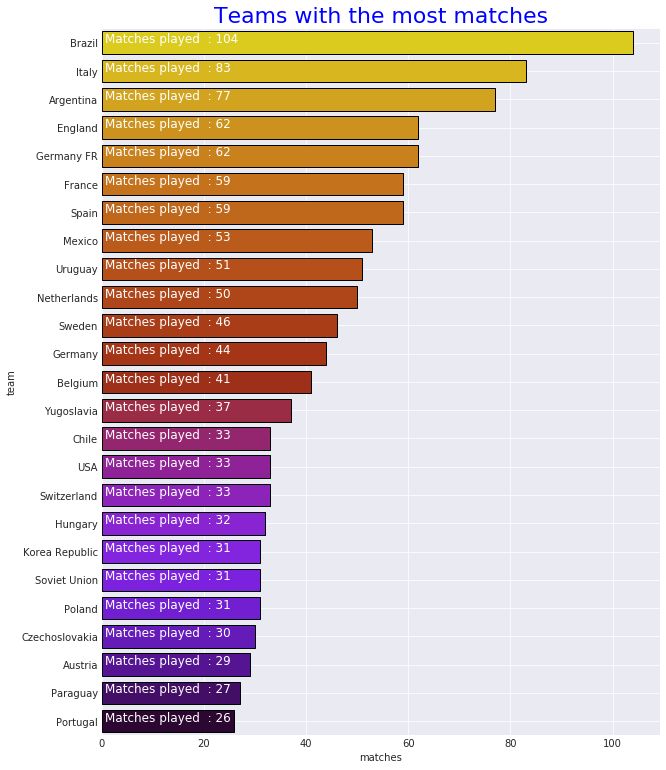

In [38]:
ht = matches["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = matches["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

plt.figure(figsize=(10,13))
ax = sns.barplot("matches","team",data=mt[:25],palette="gnuplot_r",
                 linewidth=1,edgecolor="k"*25)
plt.grid(True)
plt.title("Teams with the most matches",color='b',size=22)
for i,j in enumerate("Matches played  : " + mt["matches"][:25].astype(str)):
    ax.text(.7,i,j,fontsize=12,color="white")

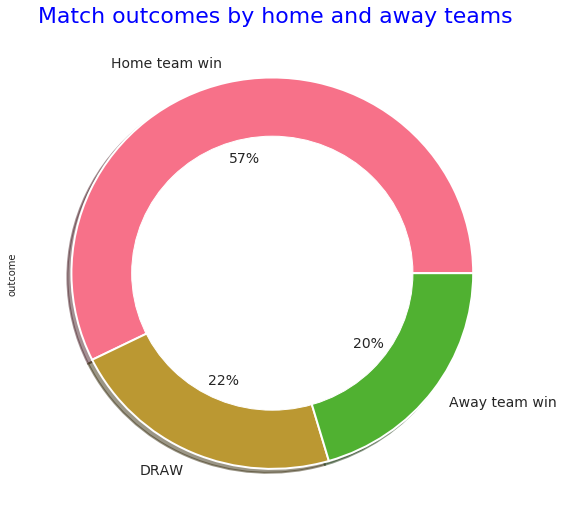

In [40]:
def label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return "Home team win"
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return "Away team win"
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"

matches["outcome"] = matches.apply(lambda matches:label(matches),axis=1)
plt.figure(figsize=(9,9))
matches["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title(" Match outcomes by home and away teams",color='b',size=22)
plt.show()

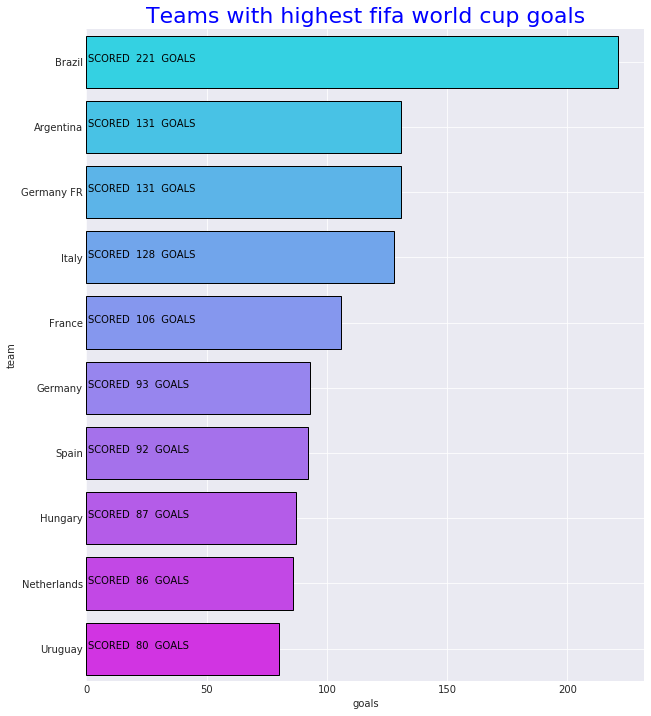

In [50]:


tt_gl_h = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
tt_gl_h.columns = ["team","goals"]

tt_gl_a = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
tt_gl_a.columns = ["team","goals"]

total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
total_goals = total_goals.groupby("team")["goals"].sum().reset_index()
total_goals = total_goals.sort_values(by="goals",ascending =False)
total_goals["goals"] = total_goals["goals"].astype(int)

plt.figure(figsize=(10,12))
ax= sns.barplot("goals","team",data=total_goals[:10],palette="cool",
                linewidth=1,edgecolor="k"*20)

for i,j in enumerate("SCORED  " +total_goals["goals"][:10].astype(str) + "  GOALS"):
    ax.text(.7,i,j,fontsize = 10,color="k")

plt.title("Teams with highest fifa world cup goals",color='b',size=22)
plt.grid(True)
plt.show()



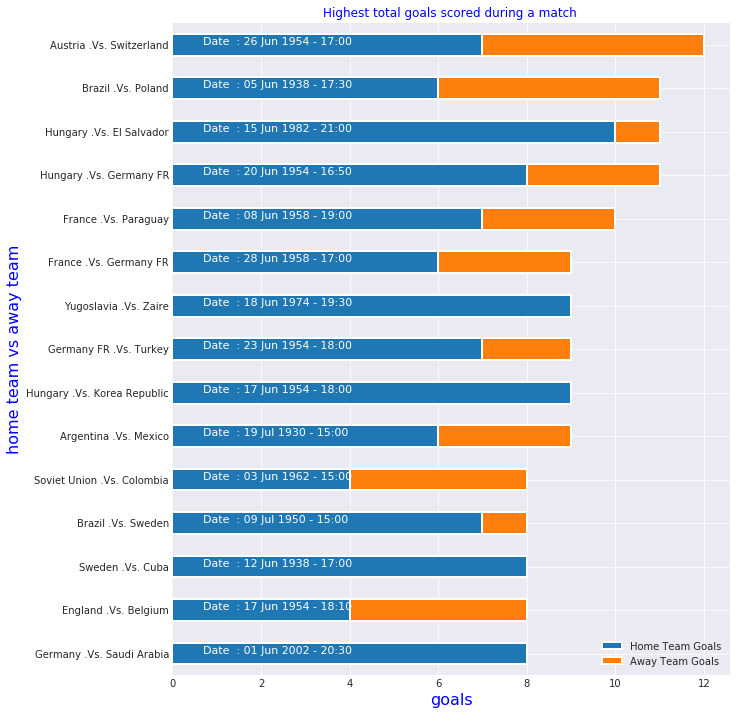

In [61]:


matches["total_goals"] = matches["Home Team Goals"] + matches["Away Team Goals"]
hig_gl = matches.sort_values(by="total_goals",ascending =False)[:15][['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
                                                                  'Home Team Goals', 'Away Team Goals', 'Away Team Name',"total_goals"]]
hig_gl["match"] = hig_gl["Home Team Name"] + " .Vs. " + hig_gl['Away Team Name']
hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals",ascending =True)
ax= hig_gl[["Home Team Goals","Away Team Goals"]].plot(kind="barh",stacked=True,
                                                       figsize=(10,12),linewidth=2,
                                                       edgecolor="w"*15)

plt.ylabel("home team vs away team",color="b",size=16)
plt.xlabel("goals",color="b",size=16)
plt.title("Highest total goals scored during a match ",color='b')

for i,j in enumerate("Date  : " + hig_gl["Datetime"]):
    ax.text(.7,i,j,color="w",fontsize=11)
    
plt.show()



In [75]:
import networkx as nx 
def interactions(year,color):
    
    df  =  matches[matches["Year"] == year][["Home Team Name","Away Team Name"]]
    G   = nx.from_pandas_edgelist(df,"Home Team Name","Away Team Name")
    
    plt.figure(figsize=(10,9))
    
    nx.draw_kamada_kawai(G,with_labels = True,
                         node_size  = 2500,
                         node_color = color,
                         node_shape = "h",
                         edgecolor  = "black",
                         linewidths  = 10 ,
                         font_size  = 13 ,
                         alpha=.5)
    
    plt.title("Interaction between teams :" + str(year) , fontsize =13 , color = "b",size=22)
 

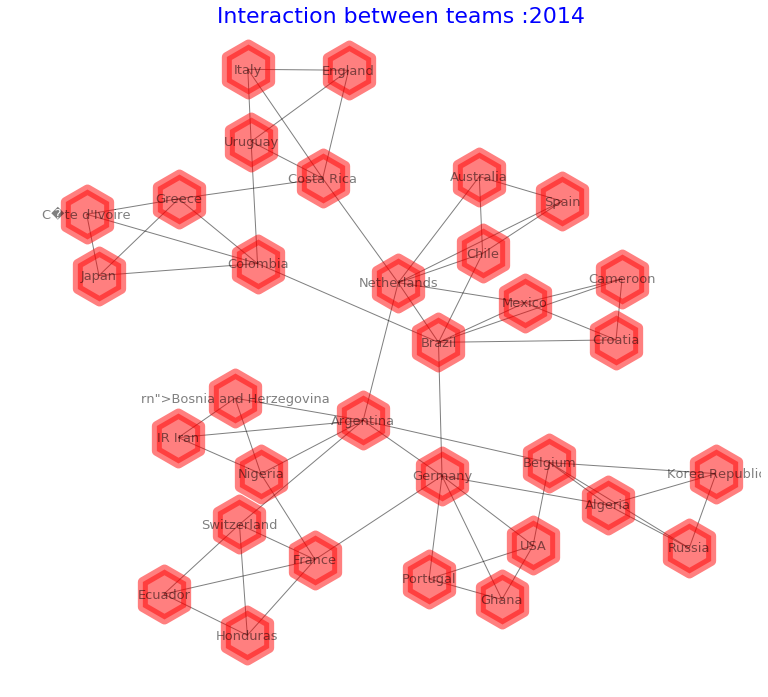

In [77]:
interactions(2014,"r")

In [133]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as FF


In [124]:
plotly.tools.set_credentials_file(username='dewaniadi', api_key='wsQ3dkRaC2vRcYLjQufh')

In [14]:

data = [
    go.Scattermapbox(
        lat=['38.91427','38.91538','38.91458',
             '38.92239','38.93222','38.90842',
             '38.91931','38.93260','38.91368',
             '38.88516','38.921894','38.93206',
             '38.91275'],
        
        lon=['-77.02827','-77.02013','-77.03155',
             '-77.04227','-77.02854','-77.02419',
             '-77.02518','-77.03304','-77.04509',
             '-76.99656','-77.042438','-77.02821',
             '-77.01239'],
        mode='markers',
        marker=dict(
            size=9
        ),
        text=["The coffee bar","Bistro Bohem","Black Cat",
             "Snap","Columbia Heights Coffee","Azi's Cafe",
             "Blind Dog Cafe","Le Caprice","Filter",
             "Peregrine","Tryst","The Coupe",
             "Big Bear Cafe"],
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken='pk.eyJ1IjoiZGV3YW5pYWRpIiwiYSI6ImNqcmpmaWF3bzBiNWo0M25ycWduY2ZpZXIifQ.mCvBZNpzOpSG4PenEgs7UQ',
        bearing=0,
        center=dict(
            lat=38.92,
            lon=-77.07
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

NameError: name 'go' is not defined

In [131]:
display(cups.head(3))


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Lattitude_w,Longitude_w
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,34°50'S,56°11'W
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363,41°54'N,12°29'E
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.7,41°54'N,12°29'E


In [134]:
cups.Lattitude_w


0     34°50'S
1     41°54'N
2     41°54'N
3     34°50'S
4     52°30'N
5     15°47'S
6     15°47'S
7     51°36'N
8     15°47'S
9     52°30'N
10    36°30'S
11    41°54'N
12    36°30'S
13    52°30'N
14    15°47'S
15    48°50'N
16    52°30'N
17    41°54'N
18    40°25'N
19    52°30'N
Name: Lattitude_w, dtype: object